# **Project Name:**

Bank Loan Approval Patterns
# **Project Type:**

Exploratory Data Analysis (EDA)

# **Project Summary**:

This project explores and analyzes a Loan Approval dataset that contains 45,000 customer records and 14 variables.
The aim is to understand financial patterns that influence loan approval, such as income, gender, credit score, loan intent, and employment experience.
Through data cleaning, visualization, and correlation study, we find insights about how banks decide to approve or reject a loan.

# **Problem Statement**

Banks receive thousands of loan applications daily.
It’s important for them to identify which applicants are more likely to repay loans.
By analyzing this dataset, we want to find:

What kind of applicants usually get loans approved?

Which features affect approval the most?

Are there any patterns or correlations among income, credit score, and loan approval?

#  **General Guidelines for EDA**

Understand your dataset (shape, columns, data types).

Clean the data (remove duplicates, missing values).

Explore the data (summary statistics).

Visualize patterns and relationships.

Draw insights and conclusions.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.subplots as sp

# **Outcome:**
 These libraries help in data loading, cleaning, visualization, and analysis.

# **Load** **Dataset**


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = "/content/drive/MyDrive/GNCIPL_AI_ML/loan_data.csv"

Mounted at /content/drive


In [3]:
df = pd.read_csv(path)

In [4]:
# first few rows are displayed to understand its structure.
df.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [5]:
# check columns and shape
df.columns
df.shape

(45000, 14)

In [6]:
#Dataset Columns
print("Columns Present in the Loan Dataset is: \n")
print(df.columns)

print("\n Data types of the columns of the dataset : ")
print(df.dtypes)


Columns Present in the Loan Dataset is: 

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

 Data types of the columns of the dataset : 
person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64

# Data Cleaning and Preprocessing

In [7]:
#We use df.info() here to check the detailed information about a dataset (DataFrame).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [8]:
# check null values
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


 There is no null values

In [9]:
# check duplicate values
df.duplicated().sum()

np.int64(0)

In [10]:
# drop  missing values and duplicate values
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


In [11]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [12]:
# Check the updated data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [13]:
# Separate categorical and numerical columns
cat_cols = ['person_gender', 'person_education', 'loan_intent', 'previous_loan_defaults_on_file']
num_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
            'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score','loan_status']



In [14]:
# Remove unrealistic ages (above 100 or below 18)
df = df[(df['person_age'] >= 18) & (df['person_age'] <= 90)]

print(" Data after cleaning invalid ages:", df.shape)
print("Minimum age:", df['person_age'].min())
print("Maximum age:", df['person_age'].max())


 Data after cleaning invalid ages: (44992, 14)
Minimum age: 20.0
Maximum age: 84.0


In [15]:

display(df.describe())

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44992.000000,4.499200e+04,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000
mean,27.746955,7.990956e+04,5.392959,9583.245288,11.006448,0.139735,5.866087,632.582592,0.222262
std,5.901543,6.332239e+04,5.917871,6314.856103,2.979019,0.087207,3.875930,50.398623,0.415771
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.719725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704600e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.577900e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,84.000000,2.448661e+06,62.000000,35000.000000,20.000000,0.660000,30.000000,784.000000,1.000000


In [16]:
print("🔹 Number of Unique Values per Column:")
display(df.nunique())


🔹 Number of Unique Values per Column:


,0
person_age,55
person_gender,2
person_education,5
person_income,33983
person_emp_exp,55
person_home_ownership,4
loan_amnt,4481
loan_intent,6
loan_int_rate,1302
loan_percent_income,64


In [17]:
# Check for negative values in numerical columns
print("Checking for negative values in numerical columns:")
for col in num_cols:
    negative_values = df[df[col] < 0]
    if not negative_values.empty:
        print(f"Column '{col}' contains negative values.")
        display(negative_values)
    else:
        print(f"Column '{col}' does not contain negative values.")

Checking for negative values in numerical columns:
Column 'person_age' does not contain negative values.
Column 'person_income' does not contain negative values.
Column 'person_emp_exp' does not contain negative values.
Column 'loan_amnt' does not contain negative values.
Column 'loan_int_rate' does not contain negative values.
Column 'loan_percent_income' does not contain negative values.
Column 'cb_person_cred_hist_length' does not contain negative values.
Column 'credit_score' does not contain negative values.
Column 'loan_status' does not contain negative values.


## Fix wrong and inconsistent data


Clean any incorrect or inconsistent entries in the dataset.

In [18]:
for col in cat_cols:
  print(f"Column: {col}")
  print(df[col].value_counts())
  print("-" * 30)

Column: person_gender
person_gender
male      24835
female    20157
Name: count, dtype: int64
------------------------------
Column: person_education
person_education
Bachelor       13396
Associate      12026
High School    11969
Master          6980
Doctorate        621
Name: count, dtype: int64
------------------------------
Column: loan_intent
loan_intent
EDUCATION            9151
MEDICAL              8547
VENTURE              7815
PERSONAL             7551
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64
------------------------------
Column: previous_loan_defaults_on_file
previous_loan_defaults_on_file
Yes    22856
No     22136
Name: count, dtype: int64
------------------------------


In [19]:
for col in num_cols:
  print(f"Column: {col}")
  print(df[col].value_counts())
  print("-" * 30)

Column: person_age
person_age
23.0    5254
24.0    5138
25.0    4507
22.0    4236
26.0    3659
27.0    3095
28.0    2728
29.0    2455
30.0    2021
31.0    1645
32.0    1403
21.0    1289
33.0    1240
34.0     980
35.0     847
36.0     740
37.0     666
38.0     503
39.0     389
40.0     349
41.0     303
42.0     247
43.0     215
44.0     177
45.0     135
46.0     114
47.0     112
48.0      93
49.0      59
50.0      56
51.0      46
52.0      42
53.0      35
55.0      24
54.0      24
58.0      20
56.0      20
20.0      17
57.0      17
60.0      16
61.0      12
66.0      11
65.0      10
70.0       7
64.0       7
62.0       7
59.0       6
69.0       5
73.0       3
63.0       3
78.0       1
80.0       1
84.0       1
76.0       1
67.0       1
Name: count, dtype: int64
------------------------------
Column: person_income
person_income
8000.0      15
73011.0     10
36995.0      9
60914.0      8
37020.0      8
            ..
33164.0      1
600891.0     1
184295.0     1
84779.0      1
14858.0     

In [20]:
print("Unique values in 'person_age'")
display(df['person_age'].unique())

print("\nUnique values in 'cb_person_cred_hist_length'")
display(df['cb_person_cred_hist_length'].unique())

Unique values in 'person_age'


array([22., 21., 25., 23., 24., 26., 20., 32., 34., 29., 33., 28., 35.,
       31., 27., 30., 36., 40., 50., 45., 37., 39., 44., 43., 41., 46.,
       38., 47., 42., 48., 49., 58., 65., 51., 53., 66., 61., 54., 57.,
       59., 62., 60., 55., 52., 64., 70., 78., 69., 56., 73., 63., 80.,
       84., 76., 67.])


Unique values in 'cb_person_cred_hist_length'


array([ 3.,  2.,  4.,  8.,  7.,  6.,  9., 10.,  5., 11., 16., 15., 12.,
       13., 17., 14., 28., 27., 22., 19., 29., 23., 26., 20., 21., 30.,
       25., 24., 18.])

**Reasoning**:
Examine the summary statistics and create box plots to identify potential outliers in the numerical columns.

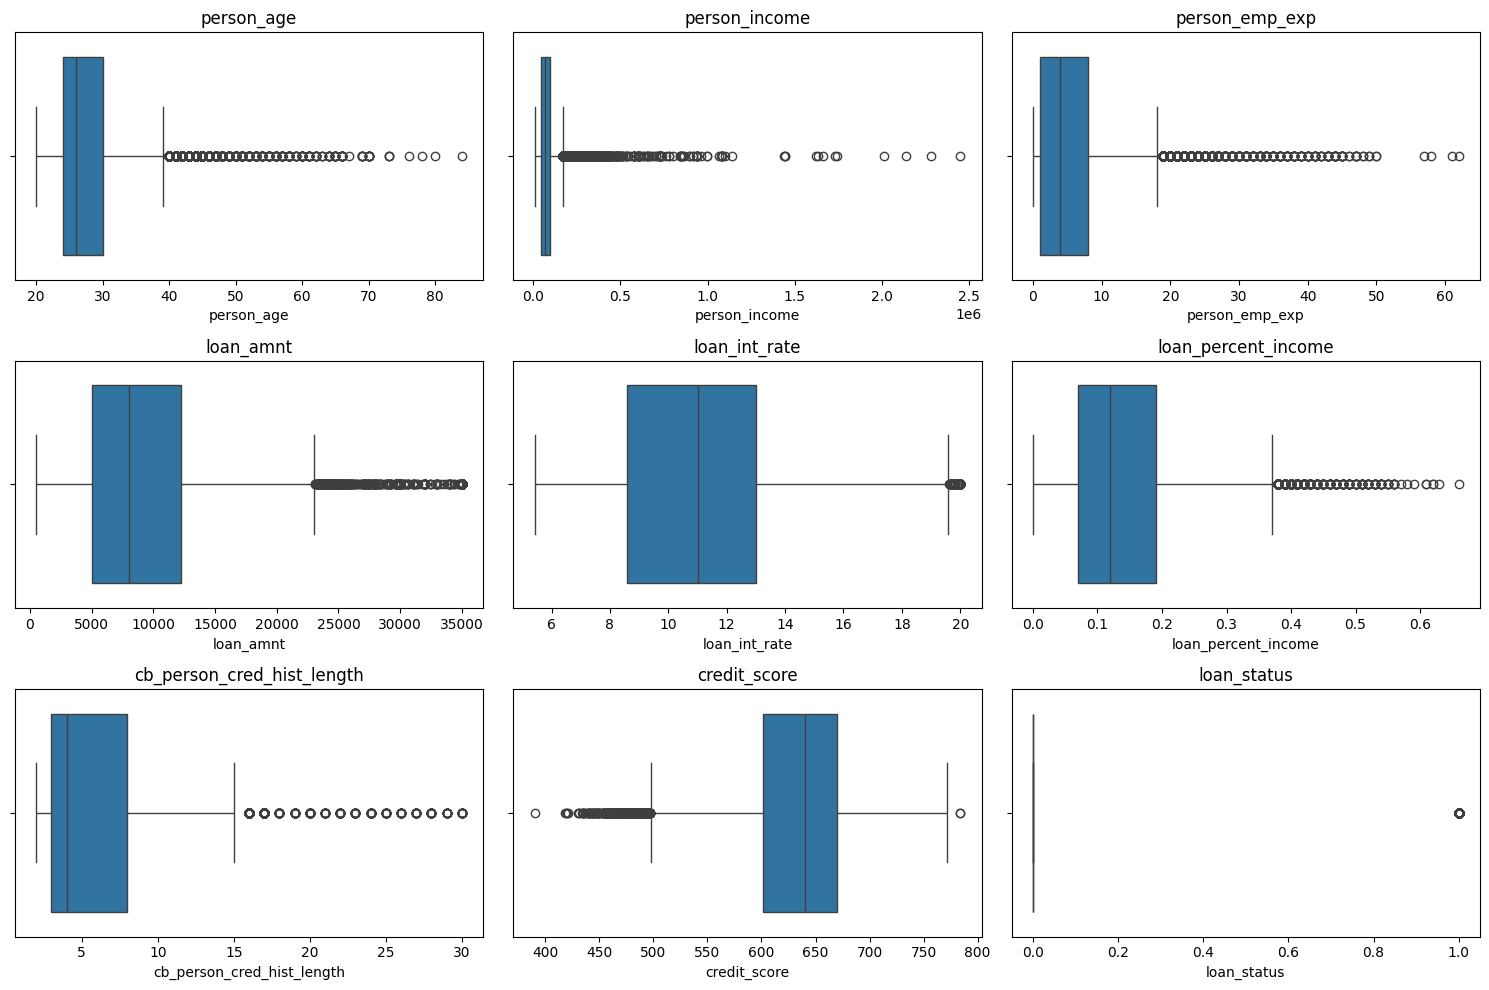

In [21]:
# Re-plot box plots after outlier capping
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**Reasoning**:
Based on the summary statistics and box plots, several numerical columns appear to have outliers (person_income, person_emp_exp, loan_int_rate, loan_percent_income, cb_person_cred_hist_length). I will use the IQR method to cap the outliers to the upper and lower bounds for these columns to mitigate their impact while retaining the data.

## Convert data types

### Subtask:
Ensure all columns have appropriate data types.

**Reasoning**:
Review the current data types, identify columns that need type conversion (specifically float64 columns that represent counts or discrete values and should be integers), and then convert them to the appropriate type. Finally, verify the changes.

In [22]:
# 1. Review the current data types
print("Data types before conversion:")
df.info()

# 3. Convert data types
# Convert 'person_age' to integer
df['person_age'] = df['person_age'].astype(int)

# Convert 'cb_person_cred_hist_length' to integer
df['cb_person_cred_hist_length'] = df['cb_person_cred_hist_length'].astype(int)


# 4. Verify the data types have been updated
print("\nData types after conversion:")
df.info()

Data types before conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 44992 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44992 non-null  float64
 1   person_gender                   44992 non-null  object 
 2   person_education                44992 non-null  object 
 3   person_income                   44992 non-null  float64
 4   person_emp_exp                  44992 non-null  int64  
 5   person_home_ownership           44992 non-null  object 
 6   loan_amnt                       44992 non-null  float64
 7   loan_intent                     44992 non-null  object 
 8   loan_int_rate                   44992 non-null  float64
 9   loan_percent_income             44992 non-null  float64
 10  cb_person_cred_hist_length      44992 non-null  float64
 11  credit_score                    44992 non-null  int64  
 12  previou

## Feature engineering

### Subtask:
Create new features if needed to improve the model's performance.

**Reasoning**:
Create the new features as instructed, handling potential division by zero, and display the first few rows of the dataframe to show the new features.

In [23]:
df.shape

(44992, 14)

# **Data Visualization**

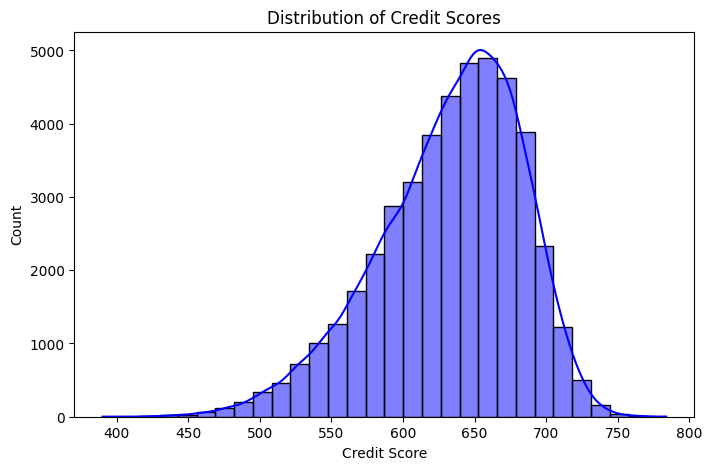

In [24]:
 #Credit score distribution

plt.figure(figsize=(8,5))
sns.histplot(df['credit_score'], bins=30, kde=True, color="blue")
plt.title("Distribution of Credit Scores")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.show()

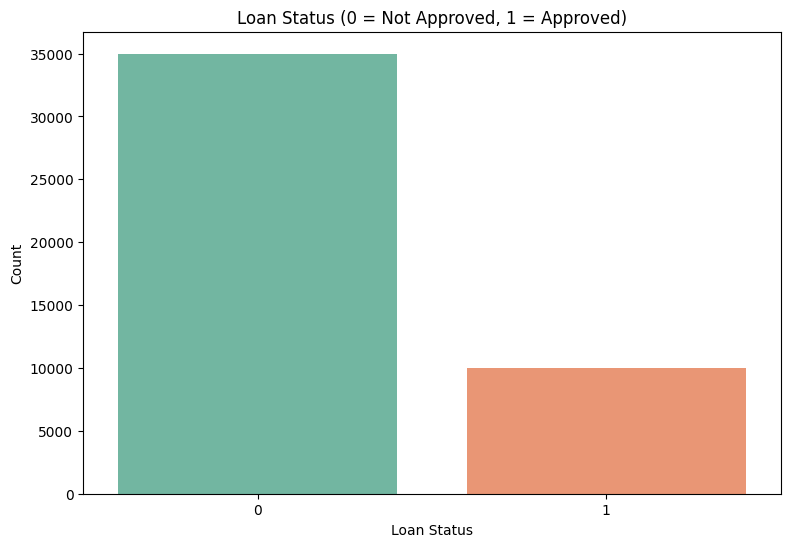

In [25]:
# Loan status 'target variable'

plt.figure(figsize=(9,6))
sns.countplot(x="loan_status", data=df, palette="Set2")
plt.title("Loan Status (0 = Not Approved, 1 = Approved)")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

In [26]:
# Loan Approval by Gender
fig = px.histogram(
    df,
    x="person_gender",
    color="loan_status",
    barmode="group",
    title="Loan Approval by Gender",
    labels={"person_gender": "Gender", "loan_status": "Loan Status"}
)
fig.update_layout(width=1000,height=500)
fig.show()


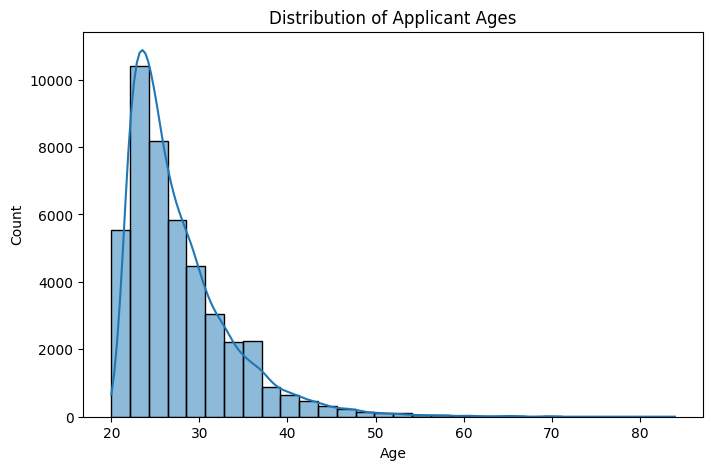

In [27]:
# Distribution of ages

plt.figure(figsize=(8,5))
sns.histplot(df['person_age'], bins=30, kde=True)
plt.title("Distribution of Applicant Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


**Outcome:** It Compares approval rates between male and female applicants.

In [28]:
# Income vs Person Employment Experience
fig = px.scatter(df,
           x='person_income',
           y='person_emp_exp',
           color ="loan_status",size='loan_amnt',
           title='Scatter Plot-Relationship between Person Income and Person Employment Experience')
fig.update_layout(width=1000, height=500)
fig.show()



**Outcome:**
It shows higher income people usually request higher loan amounts and get approvals more often.

In [29]:
# Purpose of Loan vs Loan status
fig = px.histogram(
    df,
    x="loan_intent",
    color="loan_status",
    barmode="group",
    title="Loan Intent vs Loan Status",
    labels={"loan_intent": "Loan Purpose", "loan_status": "Loan Status"}
)
fig.show()


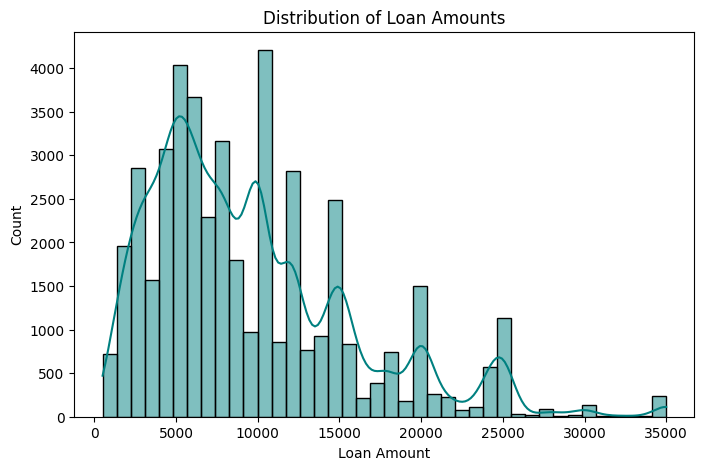

In [30]:
# Loan amount distribution

plt.figure(figsize=(8,5))
sns.histplot(df['loan_amnt'], bins=40, kde=True, color="teal")
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

In [31]:
# Credit score and Person Income
fig = px.scatter(
    df,
    x="credit_score",
    y="person_income",
    color="loan_status",
    title="Credit Score vs Income",
    labels={"credit_score": "Credit Score", "person_income": "Income"}
)
fig.show()


In [32]:
# loan status and person income
fig = px.violin(
    df,
    x="loan_status",
    y="person_income",
    color="loan_status",
    title="Income Distribution by Loan Status",
    labels={"person_income": "Applicant Income"}
)
fig.show()


### Approval % by Gender

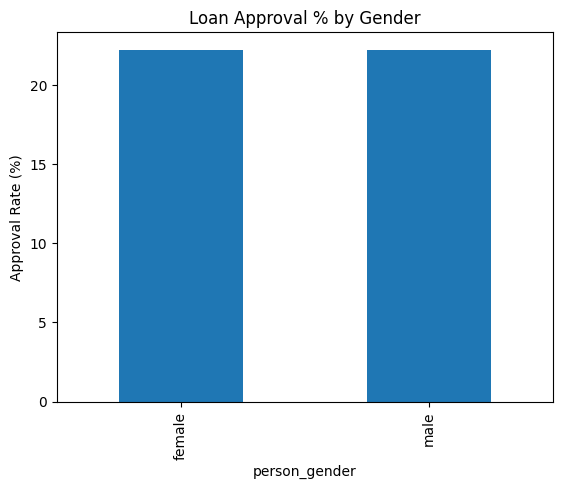

In [33]:
approval_by_gender = df.groupby('person_gender')['loan_status'].mean() * 100
approval_by_gender.plot(kind='bar')
plt.title("Loan Approval % by Gender")
plt.ylabel("Approval Rate (%)")
plt.show()


### Approval % by Income Group

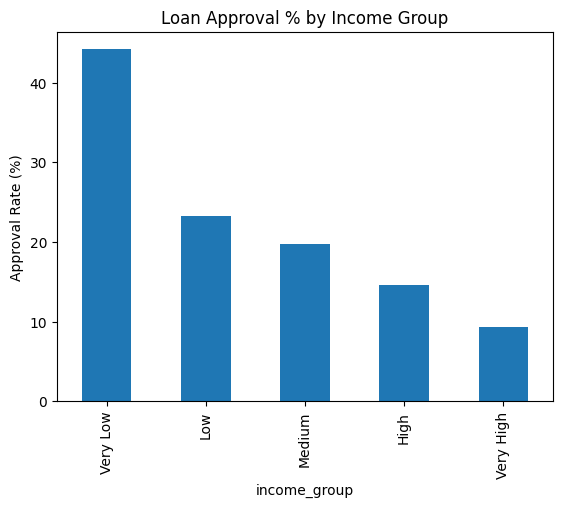

In [34]:
df['income_group'] = pd.qcut(df['person_income'], 5, labels=['Very Low','Low','Medium','High','Very High'])
approval_by_income = df.groupby('income_group')['loan_status'].mean() * 100
approval_by_income.plot(kind='bar')
plt.title("Loan Approval % by Income Group")
plt.ylabel("Approval Rate (%)")
plt.show()


In [35]:
# correlation Heatmap
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)
fig = px.imshow(corr_matrix,
                text_auto=True,
                color_continuous_scale='balance',  # or 'camp', 'icefire', 'balance'
                title='Interactive Correlation Heatmap')

fig.update_layout(width=1200, height=700)
fig.show()

In [36]:
loan_approved = df[df['loan_status'] == 1]
loan_rejected = df[df['loan_status'] == 0]

print("Average Income (Approved Loans):", loan_approved['person_income'].mean())
print("Average Credit Score (Approved Loans):", loan_approved['credit_score'].mean())
print("Average Income (Rejected Loans):", loan_rejected['person_income'].mean())
print("Average Credit Score (Rejected Loans):", loan_rejected['credit_score'].mean())


Average Income (Approved Loans): 59886.0969
Average Credit Score (Approved Loans): 631.8872
Average Income (Rejected Loans): 85631.86085390947
Average Credit Score (Rejected Loans): 632.7813214449017


# Conclusion :

In this project, we found that loan approval mainly depends on a person’s credit score, income, and past loan history. People with good credit scores, higher income, and no previous defaults get approved more often. Factors like gender or education do not affect approval much.

Overall, the analysis helps us understand why some loans are approved and others are rejected, and these insights can help in making better loan decisions in the future.